In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("customer_churn_dataset.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nFirst 5 Rows:")
print(df.head())

Shape of dataset: (64374, 12)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None

Summary Statistics:
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374

In [3]:
# Missing values check
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [4]:
# Drop irrelevant column
df = df.drop(columns=['CustomerID'])

# Confirm shape after dropping
print("New Shape:", df.shape)

New Shape: (64374, 11)


In [5]:
# Summary stats for numerical columns
print(df.describe())

                Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction         Churn  
count   64374.000000  64374.000000      64374.000000  64374.000000  
mean       17.133952    541.023379         15.498850      0.473685  
std         8.852211    260.874809          8.638436      0.499311  
min         0.000000    100.000000          1.000000      0.000000  
25%        10.000000    313.00000

# Step 2

In [6]:
import pandas as pd

# 1. Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2. One-hot encode Subscription Type
df = pd.get_dummies(df, columns=['Subscription Type'], drop_first=True)  
# drop_first=True avoids dummy trap (creates k-1 columns)

# 3. Map Contract Length to numeric months
contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df['Contract Length'] = df['Contract Length'].map(contract_map)

# Verify changes
print("\nData types after encoding:")
print(df.dtypes)

print("\nUnique values per categorical column:")
print("Gender:", df['Gender'].unique())
print("Contract Length:", df['Contract Length'].unique())
print("Subscription Type columns:", [col for col in df.columns if "Subscription Type" in col])


Data types after encoding:
Age                           int64
Gender                        int64
Tenure                        int64
Usage Frequency               int64
Support Calls                 int64
Payment Delay                 int64
Contract Length               int64
Total Spend                   int64
Last Interaction              int64
Churn                         int64
Subscription Type_Premium      bool
Subscription Type_Standard     bool
dtype: object

Unique values per categorical column:
Gender: [0 1]
Contract Length: [ 1 12  3]
Subscription Type columns: ['Subscription Type_Premium', 'Subscription Type_Standard']


In [7]:
# Display 15 sample rows after encoding
print(df.head(30))

    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0    22       0      25               14              4             27   
1    41       0      28               28              7             13   
2    47       1      27               10              2             29   
3    35       1       9               12              5             17   
4    53       0      58               24              9              2   
5    30       1      41               14             10             10   
6    47       0      37               15              9             28   
7    54       0      36               11              0             18   
8    36       1      20                5             10              8   
9    65       1       8                4              2             23   
10   46       0      42               27              9             21   
11   56       1      13               23              5             14   
12   31       1       2               

In [8]:
# Count how many customers are Standard, Premium, and Basic
subscription_counts = pd.Series(dtype=int)

subscription_counts['Standard'] = df['Subscription Type_Standard'].sum()
subscription_counts['Premium'] = df['Subscription Type_Premium'].sum()
subscription_counts['Basic'] = len(df) - (subscription_counts['Standard'] + subscription_counts['Premium'])

print(subscription_counts)

Standard    21502
Premium     21421
Basic       21451
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
              'Payment Delay', 'Last Interaction', 'Total Spend']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Verify scaling
print(df[scale_cols].head())
print("\nScaled column means (should be close to 0):\n", df[scale_cols].mean())
print("\nScaled column std (should be close to 1):\n", df[scale_cols].std())

        Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -1.434202 -0.409100        -0.122526      -0.449807       1.114538   
1 -0.069730 -0.233642         1.465424       0.513590      -0.467000   
2  0.361155 -0.292128        -0.576225      -1.092072       1.340472   
3 -0.500616 -1.344876        -0.349375      -0.128674      -0.015132   
4  0.792041  1.520939         1.011724       1.155855      -1.709637   

   Last Interaction  Total Spend  
0         -0.752324     0.218408  
1          0.521065     0.164742  
2          0.636827     0.827900  
3          0.289540    -1.184575  
4          0.289540    -0.030756  

Scaled column means (should be close to 0):
 Age                -1.801357e-16
Tenure             -9.183390e-17
Usage Frequency     5.651317e-17
Support Calls      -1.483471e-16
Payment Delay      -1.554112e-16
Last Interaction    2.560753e-17
Total Spend        -4.944902e-17
dtype: float64

Scaled column std (should be close to 1):
 Age                 1

In [10]:
# 1. is_monthly feature
df['is_monthly'] = (df['Contract Length'] == 1).astype(int)

# 2. Support Calls per Tenure (avoid division by zero using where)
df['SupportCalls_per_Tenure'] = df['Support Calls'] / df['Tenure'].where(df['Tenure'] != 0, 1)

# 3. Delayed Payments percentage
df['DelayedPayments_percent'] = df['Payment Delay'] / df['Tenure'].where(df['Tenure'] != 0, 1)

# Verify new features
print(df[['Contract Length','is_monthly','SupportCalls_per_Tenure','DelayedPayments_percent']].head(10))

   Contract Length  is_monthly  SupportCalls_per_Tenure  \
0                1           1                 1.099504   
1                1           1                -2.198198   
2               12           0                 3.738338   
3                3           0                 0.095678   
4               12           0                 0.759961   
5                1           1                 2.804353   
6                3           0                 3.948500   
7                1           1                -7.403890   
8                1           1                -2.105381   
9               12           0                 0.778182   

   DelayedPayments_percent  
0                -2.724368  
1                 1.998789  
2                -4.588652  
3                 0.011252  
4                -1.124067  
5                -1.530163  
6                 4.193262  
7                 0.417658  
8                 1.470836  
9                -0.472202  


In [11]:
# Check data types
print(df.dtypes)

# Check missing values
print("\nMissing values check:\n", df.isnull().sum())

Age                           float64
Gender                          int64
Tenure                        float64
Usage Frequency               float64
Support Calls                 float64
Payment Delay                 float64
Contract Length                 int64
Total Spend                   float64
Last Interaction              float64
Churn                           int64
Subscription Type_Premium        bool
Subscription Type_Standard       bool
is_monthly                      int32
SupportCalls_per_Tenure       float64
DelayedPayments_percent       float64
dtype: object

Missing values check:
 Age                           0
Gender                        0
Tenure                        0
Usage Frequency               0
Support Calls                 0
Payment Delay                 0
Contract Length               0
Total Spend                   0
Last Interaction              0
Churn                         0
Subscription Type_Premium     0
Subscription Type_Standard    0
is_month

# Data Split & Model Training

In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set shape: (51499, 14)
Testing set shape: (12875, 14)

Churn distribution in training set:
Churn
0    0.526321
1    0.473679
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.526291
1    0.473709
Name: proportion, dtype: float64


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Logistic Regression Results ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Logistic Regression Results ===
Accuracy:  0.8275
Precision: 0.8144
Recall:    0.8236
F1 Score:  0.8189

Confusion Matrix:
 [[5631 1145]
 [1076 5023]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      6776
           1       0.81      0.82      0.82      6099

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy' for Information Gain
    max_depth=None,       # Let the tree grow fully first (we can tune this later)
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("=== Decision Tree Results ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

=== Decision Tree Results ===
Accuracy:  0.9984
Precision: 0.9979
Recall:    0.9989
F1 Score:  0.9984

Confusion Matrix:
 [[6763   13]
 [   7 6092]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



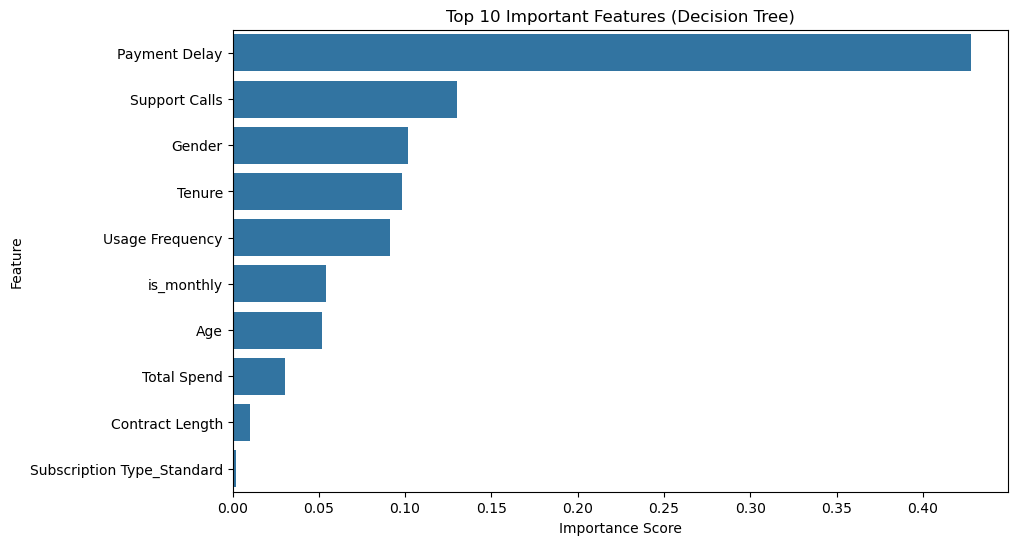

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance visualization
feature_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()